# Problem Statement

### This Data set contains network of restaurants available in the 'Swiggy Mobile app' platform encompassing 150K restaurants across 600 cities in India. This pipleline explores if certain factors are the potential reasons for a restaurant to receive massive number of ratings and the same is predicted using three algorithm models with evaluation metric. Also,distribution of ratings accross all the restaurants are explored and captured to identify if below variables appeals and influences a significant number of ratings for a restaurant.

### With this data set, The criteria chosen here is " large No of Ratings" which is $dependent  variable$ which reflects Popularity,Revenue and a contributing factor for Success of the Restaurant .
### The factors influencing the huge number of ratings (Revenue potential,Popularity,Success) are " Number of Offers", "Average price for a person" , "Value proposition" and various other factors  such as  Pricing category, Maximum Rating as $independent  variable$ is also considered for the analysis.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import sklearn.compose
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score

## DATA COLLECTION

### Data set from kaggle.com

In [2]:
# The dataset is retrieved from Kaggle https://www.kaggle.com/datasets/rrkcoder/swiggy-restaurants-dataset/data 
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1xSRGC5b3OCj7yS4Qgauxy9LVh8mqkMJD")
df.head()
#DF -> Data Frame

,Restaurant Name,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Offer Name,Area,Pure Veg,Location
0,La Pino'Z Pizza,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,FLAT DEAL\nFLAT ₹125 OFF\nUSE FLAT125ABOVE ₹69...,LALA LAJPAT RAI MARKET,No,Abohar
1,The Second Wife,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,"30% OFF UPTO ₹75\nUSE TRYNEWABOVE ₹149, FLAT ₹...",Central Abohar,No,Abohar
2,Tasty Bites,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,FLAT ₹120 OFF\nUSE AXIS120ABOVE ₹500,Central Abohar,Yes,Abohar
3,Food Studio,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,"50% OFF UPTO ₹100\nUSE TRYNEWABOVE ₹129, FLAT ...",Central Abohar,Yes,Abohar
4,Roll Express,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,DEAL OF DAY\n10% OFF UPTO ₹40\nUSE STEALDEALAB...,Circular Road,No,Abohar


## DATA EXPLORATION

### A comprehensive Data Exploration has been done to determine and find the missing values . The Heat Map shows there are missing values in Number of Ratings column and Offer Name column below. Data is cleaned for these columns.

In [3]:
print(df.info)

<bound method DataFrame.info of                      Restaurant Name                Cuisine Rating  \
0                    La Pino'Z Pizza         Pizzas, Pastas    4.0   
1                    The Second Wife   Indian, North Indian    3.6   
2                        Tasty Bites     Italian, Beverages    3.8   
3                        Food Studio        Pizzas, Burgers    3.5   
4                       Roll Express      Fast Food, Snacks    4.3   
...                              ...                    ...    ...   
140652             Yummy Momo'S Cafe     Chinese, Fast Food    4.6   
140653              CAFE FIRST FLOOR      Beverages, Snacks    3.2   
140654  Cafe Coffee Aani Barach Kahi                 Snacks    3.2   
140655       Patil Family Restaurant  North Indian, Biryani    4.3   
140656      Prabhakar Mama Cha Dhaba           North Indian     --   

       Number of Ratings Average Price  Number of Offers  \
0            10+ ratings  ₹250 for two                 2   
1      

In [4]:
df.isnull().sum()

Restaurant Name          0
Cuisine                 27
Rating                   0
Number of Ratings    14542
Average Price            0
Number of Offers         0
Offer Name            1808
Area                     2
Pure Veg                 0
Location                 0
dtype: int64

<Axes: >

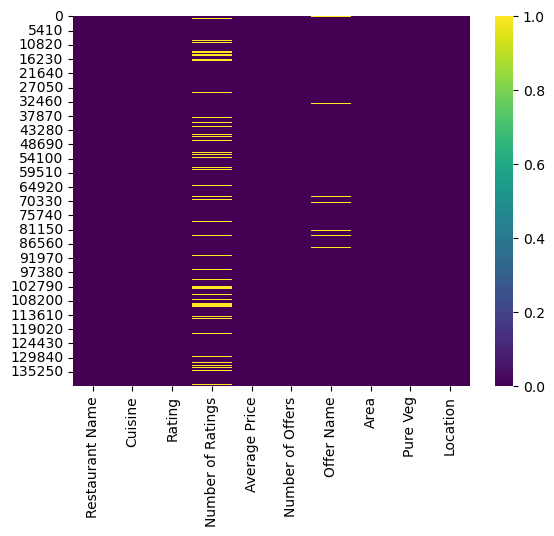

In [5]:
#Heat Map shows there are missing values in Number of Ratings column and Offer Name column
sns.heatmap(df.isnull(),cmap="viridis")

## DATA PREPROCESSING

### The Data preprocessing involved:
 ### -  Dropping unwanted columns
 ### - Preprocessing missing values and unsuable values
  ### - Splitting Columns and extracting values from the same
  ### - Making categorical data from the columns available by grouping and also trying to connect with other columns to see if it added a value to the data set and analysis
 ### - Mean, median, Mode and Standard Deviation for analysing descriptive nature of the data.
  ### - Checking for Outliers using Z Score

In [6]:
df.drop(["Restaurant Name","Offer Name","Area","Pure Veg"],axis=1, inplace = True)

In [7]:
df.head(5)

,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Location
0,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,Abohar
1,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,Abohar
2,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,Abohar
3,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,Abohar
4,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,Abohar


##### PREPROCESSING MISSING VALUES

In [8]:
# Missing values are filled with "Not Rated" for column "Number of Ratings" and "Unknown" for the columns "Offer Name" & "Cuisine"
df.fillna(value={'Number of Ratings':"Not Rated",'Offer Name':"Unknown",'Cuisine':"Unknown"},inplace = True)

In [9]:
df.isnull().sum()

Cuisine              0
Rating               0
Number of Ratings    0
Average Price        0
Number of Offers     0
Location             0
dtype: int64

<Axes: >

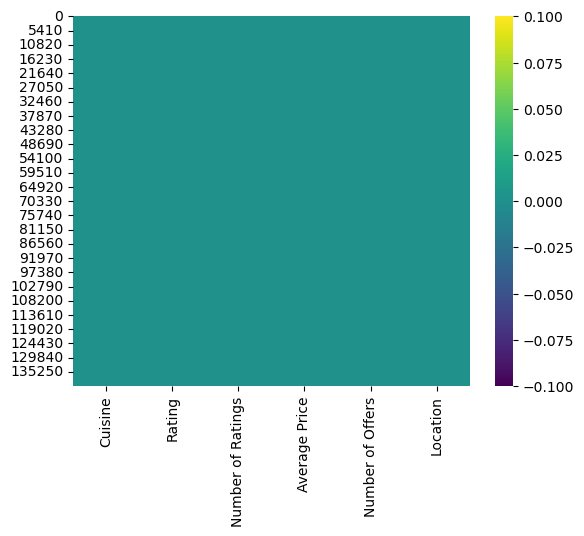

In [10]:
#Heatmap to check for missing values after Data Preprocessing
sns.heatmap(df.isnull(),cmap="viridis")

In [11]:
df

,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Location
0,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,Abohar
1,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,Abohar
2,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,Abohar
3,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,Abohar
4,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,Abohar
...,...,...,...,...,...,...
140652,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,Yavatmal
140653,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,Yavatmal
140654,Snacks,3.2,50+ ratings,₹150 for two,2,Yavatmal
140655,"North Indian, Biryani",4.3,9 ratings,₹200 for two,2,Yavatmal


#### "Average Price" column is split into two different columns "Average Amount" and "Number of people"

In [12]:
# Amount, and average number of people are Extracted
df['Avg_Amt'] = df['Average Price'].str.extract(r'(\d+)').astype(float)
df['No_of_PPL'] = df['Average Price'].str.extract(r'for (.*)')

#Avg_Amt -> Average price for two without currency symbol and text
#No_of_PPL -> Number of people in text format

In [13]:
df.head(5)

,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Location,Avg_Amt,No_of_PPL
0,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,Abohar,250.0,two
1,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,Abohar,250.0,two
2,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,Abohar,200.0,two
3,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,Abohar,49.0,two
4,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,Abohar,200.0,two


In [14]:
display(df.dtypes)

Cuisine               object
Rating                object
Number of Ratings     object
Average Price         object
Number of Offers       int64
Location              object
Avg_Amt              float64
No_of_PPL             object
dtype: object

In [15]:
#Replaced "NEW" with a default value
deflt_rating = 3.5  # I have chosen 3.5 as default rating
df['Rating'].replace(['NEW','--'], deflt_rating, inplace=True)

#deflt_rating -> Default Rating

In [16]:
df['Rating'] = df['Rating'].astype(float)

#### The numbers are categorized into categorical values for column "Number of ratings". It is categorized into " <500 " and " >=500 ". The "Invalid Category" and the "Not Rated" which had 15K values have been dropped from the category after transforming the data into columns.

In [17]:
# A function is created to create Categories "encode_no_of_ratgs" from Number of Ratings column
def encode_no_of_ratgs(no_of_ratgs):
    if no_of_ratgs in ['2 ratings', '3 ratings', '4 ratings', '5 ratings','6 ratings', '7 ratings', '8 ratings', '9 ratings','10+ ratings', '20+ ratings', '50+ ratings', '100+ ratings']:
        return "<500"
    elif no_of_ratgs in ['500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings']:
        return ">=500"
    elif no_of_ratgs in ["Too Few Ratings", "Not Rated"]:
        return "Not Rated"
    else:
        return "Invalid category"
    
#no_of_ratgs -> Number of Ratings
#<500 - 0 till 499
#>=500 - Above 500 customers rated
#Not Rated - Has text "Too Few Ratings and "Not Rated"
#Invalid Category

    
# The function creates a new column "No_of_ratg_catgy" with the values(<500 which is"less,">=500"which is more) created from the 'Number of Ratings' column
df['No_of_ratg_catgy'] = df['Number of Ratings'].apply(encode_no_of_ratgs)
df

#No_of_ratg_Catgy -> Number of Rating Category

,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Location,Avg_Amt,No_of_PPL,No_of_ratg_catgy
0,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,Abohar,250.0,two,<500
1,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,Abohar,250.0,two,<500
2,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,Abohar,200.0,two,<500
3,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,Abohar,49.0,two,<500
4,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,Abohar,200.0,two,<500
...,...,...,...,...,...,...,...,...,...
140652,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,Yavatmal,100.0,two,<500
140653,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,Yavatmal,200.0,two,<500
140654,Snacks,3.2,50+ ratings,₹150 for two,2,Yavatmal,150.0,two,<500
140655,"North Indian, Biryani",4.3,9 ratings,₹200 for two,2,Yavatmal,200.0,two,<500


In [18]:
df = df.drop(df[df['No_of_ratg_catgy'] == 'Not Rated'].index)
df

,Cuisine,Rating,Number of Ratings,Average Price,Number of Offers,Location,Avg_Amt,No_of_PPL,No_of_ratg_catgy
0,"Pizzas, Pastas",4.0,10+ ratings,₹250 for two,2,Abohar,250.0,two,<500
1,"Indian, North Indian",3.6,50+ ratings,₹250 for two,2,Abohar,250.0,two,<500
2,"Italian, Beverages",3.8,10+ ratings,₹200 for two,1,Abohar,200.0,two,<500
3,"Pizzas, Burgers",3.5,8 ratings,₹49 for two,5,Abohar,49.0,two,<500
4,"Fast Food, Snacks",4.3,100+ ratings,₹200 for two,2,Abohar,200.0,two,<500
...,...,...,...,...,...,...,...,...,...
140651,"Fast Food, Snacks",3.6,20+ ratings,₹300 for two,5,Yavatmal,300.0,two,<500
140652,"Chinese, Fast Food",4.6,3 ratings,₹100 for two,3,Yavatmal,100.0,two,<500
140653,"Beverages, Snacks",3.2,3 ratings,₹200 for two,2,Yavatmal,200.0,two,<500
140654,Snacks,3.2,50+ ratings,₹150 for two,2,Yavatmal,150.0,two,<500


In [19]:
df['Number of Offers'] = df['Number of Offers'].astype(float)
df.drop(['Cuisine','Number of Ratings','Average Price','Location','No_of_PPL'],axis=1,inplace=True)
df

,Rating,Number of Offers,Avg_Amt,No_of_ratg_catgy
0,4.0,2.0,250.0,<500
1,3.6,2.0,250.0,<500
2,3.8,1.0,200.0,<500
3,3.5,5.0,49.0,<500
4,4.3,2.0,200.0,<500
...,...,...,...,...
140651,3.6,5.0,300.0,<500
140652,4.6,3.0,100.0,<500
140653,3.2,2.0,200.0,<500
140654,3.2,2.0,150.0,<500


In [20]:
display(df.dtypes)

Rating              float64
Number of Offers    float64
Avg_Amt             float64
No_of_ratg_catgy     object
dtype: object

In [21]:
# Converted categorical variable Number_of_Ratings columns to two new columns "No_of_ratg_catgy_>=500,"No_of_ratg_catgy_<500" with binary values
no_ratg = pd.get_dummies(df, columns=['No_of_ratg_catgy'],drop_first=True)
no_ratg.drop(["Rating","Number of Offers","Avg_Amt"],axis=1,inplace=True)
no_ratg.head(5)

#no_ratg -> Two columns are created "No_of_ratg_catgy_<500","No_of_ratg_catgy_>=500"

,No_of_ratg_catgy_>=500
0,False
1,False
2,False
3,False
4,False


In [22]:
# Two new columns are combined into Data set"
df2=pd.concat([df,no_ratg],axis=1)
df2.drop(["No_of_ratg_catgy"],axis=1,inplace=True)
df2

#df2-> modified Data Frame

,Rating,Number of Offers,Avg_Amt,No_of_ratg_catgy_>=500
0,4.0,2.0,250.0,False
1,3.6,2.0,250.0,False
2,3.8,1.0,200.0,False
3,3.5,5.0,49.0,False
4,4.3,2.0,200.0,False
...,...,...,...,...
140651,3.6,5.0,300.0,False
140652,4.6,3.0,100.0,False
140653,3.2,2.0,200.0,False
140654,3.2,2.0,150.0,False


In [23]:
# Average price for single person is calculated from "Avg_Amt" column
df2['Avg price_for_one'] = df2['Avg_Amt'] / 2

# Overall value proposition is calculated by multiplying "Avg price_for_one" column and "Number of Offers"
df2['overall_value_proposition'] = df2['Avg price_for_one'] * df2['Number of Offers']

#Avg price_for_one -> Average Price for a single person
#overall_value_proposition -> overall value proposition

In [24]:
df2

,Rating,Number of Offers,Avg_Amt,No_of_ratg_catgy_>=500,Avg price_for_one,overall_value_proposition
0,4.0,2.0,250.0,False,125.0,250.0
1,3.6,2.0,250.0,False,125.0,250.0
2,3.8,1.0,200.0,False,100.0,100.0
3,3.5,5.0,49.0,False,24.5,122.5
4,4.3,2.0,200.0,False,100.0,200.0
...,...,...,...,...,...,...
140651,3.6,5.0,300.0,False,150.0,750.0
140652,4.6,3.0,100.0,False,50.0,150.0
140653,3.2,2.0,200.0,False,100.0,200.0
140654,3.2,2.0,150.0,False,75.0,150.0


In [25]:
# # A function is created for new column "Price Categories "Low price: <250","high price: >=250" from "Avg price_for_one" column

def categorize_price(price):
    if price < 250:
        return '<250'
    else:
        return '>=250'
    
# The "price_category" column will include all the price categories created
df2['price_category'] = df2['Avg price_for_one'].apply(categorize_price)
df2

#"categorize_price" -> Function to categorize price
#"price_category"-> New columns with price categories "low","High"

,Rating,Number of Offers,Avg_Amt,No_of_ratg_catgy_>=500,Avg price_for_one,overall_value_proposition,price_category
0,4.0,2.0,250.0,False,125.0,250.0,<250
1,3.6,2.0,250.0,False,125.0,250.0,<250
2,3.8,1.0,200.0,False,100.0,100.0,<250
3,3.5,5.0,49.0,False,24.5,122.5,<250
4,4.3,2.0,200.0,False,100.0,200.0,<250
...,...,...,...,...,...,...,...
140651,3.6,5.0,300.0,False,150.0,750.0,<250
140652,4.6,3.0,100.0,False,50.0,150.0,<250
140653,3.2,2.0,200.0,False,100.0,200.0,<250
140654,3.2,2.0,150.0,False,75.0,150.0,<250


In [26]:
# Converted categorical variable Number_of_Ratings columns to two new columns "price_category_>=250","price_category_<250 with binary values
Pricerange = pd.get_dummies(df2, columns=['price_category'],drop_first=True)
Pricerange.drop(['Rating','Number of Offers','Avg_Amt','No_of_ratg_catgy_>=500','Avg price_for_one','overall_value_proposition'],axis=1,inplace=True)
Pricerange.head(5)

#Pricerange -> Two new columns are created "price_category_>=250","price_category_<250"

,price_category_>=250
0,False
1,False
2,False
3,False
4,False


In [27]:
df3=pd.concat([df2,Pricerange],axis=1)
df3

#df3 -> Updated Data Frame

,Rating,Number of Offers,Avg_Amt,No_of_ratg_catgy_>=500,Avg price_for_one,overall_value_proposition,price_category,price_category_>=250
0,4.0,2.0,250.0,False,125.0,250.0,<250,False
1,3.6,2.0,250.0,False,125.0,250.0,<250,False
2,3.8,1.0,200.0,False,100.0,100.0,<250,False
3,3.5,5.0,49.0,False,24.5,122.5,<250,False
4,4.3,2.0,200.0,False,100.0,200.0,<250,False
...,...,...,...,...,...,...,...,...
140651,3.6,5.0,300.0,False,150.0,750.0,<250,False
140652,4.6,3.0,100.0,False,50.0,150.0,<250,False
140653,3.2,2.0,200.0,False,100.0,200.0,<250,False
140654,3.2,2.0,150.0,False,75.0,150.0,<250,False


In [28]:
# Mean ,Median, Mode and Standard deviation
print(df[['Rating', 'Avg_Amt', 'Number of Offers']].mean())
print(df[['Rating', 'Avg_Amt', 'Number of Offers']].median())
print(df[['Rating', 'Avg_Amt', 'Number of Offers']].mode())
print(df[['Rating', 'Avg_Amt', 'Number of Offers']].std())

Rating                4.037971
Avg_Amt             269.751650
Number of Offers      3.290654
dtype: float64
Rating                4.1
Avg_Amt             250.0
Number of Offers      4.0
dtype: float64
   Rating  Avg_Amt  Number of Offers
0     4.3    200.0               4.0
Rating                0.495816
Avg_Amt             141.880900
Number of Offers      1.568435
dtype: float64


In [29]:
df3.drop(['Avg_Amt','price_category'],axis=1,inplace=True)

In [30]:
df3.head(10)

,Rating,Number of Offers,No_of_ratg_catgy_>=500,Avg price_for_one,overall_value_proposition,price_category_>=250
0,4.0,2.0,False,125.0,250.0,False
1,3.6,2.0,False,125.0,250.0,False
2,3.8,1.0,False,100.0,100.0,False
3,3.5,5.0,False,24.5,122.5,False
4,4.3,2.0,False,100.0,200.0,False
5,4.1,1.0,False,125.0,125.0,False
6,3.9,2.0,False,125.0,250.0,False
7,4.2,1.0,False,100.0,100.0,False
9,4.3,2.0,False,150.0,300.0,False
10,3.2,1.0,False,100.0,100.0,False


### OUTLIER CHECK

##### The Unsual Data points are identified in the data set for each column so that values are not skewed. However , there are no inconsistencies predicted for the variables checked. There could be various features which can be collected and checked for abnormality in the values apart from the above data ,if available. However, there are NO Outliers for the available data. 

In [31]:
# Outliers are checked in specific columns
chk_col = ['Rating', 'Avg price_for_one', 'Number of Offers','No_of_ratg_catgy_>=500']
z_scores = np.abs((df3[chk_col] - df3[chk_col].mean()) / df3[chk_col].std())
# Threshold for Z Score (e.g., 3 standard deviations)
threshold = 3
outliers = (z_scores > threshold)
print("Unusual Data Points:")
print(outliers)


Unusual Data Points:
        Rating  Avg price_for_one  Number of Offers  No_of_ratg_catgy_>=500
0        False              False             False                   False
1        False              False             False                   False
2        False              False             False                   False
3        False              False             False                   False
4        False              False             False                   False
...        ...                ...               ...                     ...
140651   False              False             False                   False
140652   False              False             False                   False
140653   False              False             False                   False
140654   False              False             False                   False
140655   False              False             False                   False

[106938 rows x 4 columns]


## FEATURE ENGINEERING

## Spliting Data set in to Train Set and Test Set

In [32]:
X=df3.drop(["No_of_ratg_catgy_>=500"],axis=1) #X is independentvariable_x
y=df3["No_of_ratg_catgy_>=500"] #y is dependentvariable_y
X= X.rename(str,axis="columns") 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

print("df size:",df.shape)
print("x_train size:",X_train.shape)
print("x_test size:",X_test.shape)

df size: (106938, 4)
x_train size: (74856, 5)
x_test size: (32082, 5)


##### STANDARD SCALING 

### This step is carried out to prevent over influence of values in the data set and so that unsual data points have less impact over the scaled values.

In [34]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
print(scaler.transform(X_train))

[[ 0.12505861 -0.18536467 -0.84473291 -0.65941573 -0.27348025]
 [-0.27903296 -2.09740238 -0.48995645 -1.33277568 -0.27348025]
 [ 0.12505861 -1.46005648 -0.49705198 -1.03500095 -0.27348025]
 ...
 [-0.68312454 -0.82271057 -0.13517999 -0.58459796 -0.27348025]
 [-0.68312454  0.45198124 -0.48995645 -0.13569133 -0.27348025]
 [-1.69335347  1.08932714 -0.13517999  0.53766862 -0.27348025]]


## Hyper Parameter Tuning for Decision Tree

### This Hyper parameter tuning for sample split here is considered ( 10,4 ) to avoid overfitting so that large values are regularized while values (2,1) to fine tune the model and and have more detailed splitting. The sqrt and log2 are most common parameters used to analyse complex problems. Hence the same is considered here. Also The range of values here is chosen to analyse wide range of possibilities and explore different depths.

### The CROSS VALIDATION performed here is "Grid Search" which decently estimated the values mentioned above to maximize the score for the remaining data.

In [35]:
#Hyper Parameter Tuning
DT = Pipeline([('clf', DecisionTreeClassifier())])

#Hyperparameter grid is declared:
param_grid = {
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(DT,param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best param: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Accuracy Score
accuracy = grid_search.score(X_test, y_test)
print("Accuracy for Test Set: ", accuracy)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best param:  {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 5}
Best score:  0.7458052787531002
Accuracy for Test Set:  0.7456517673461754


## MODEL TRAINING

### The Logistic Regression, The Decision Tree, The Gradient Boosting Classification are the three models chosen to train the data set

### Decision Tree and Gradient Boosting specifically are used for imbalanced data set and is the rationale for choosing the models. Also Logistic Regression is trained to identify the features correctly and to model the relationship between "predicted" and "Target" variable by avoiding the outliers 

In [36]:
#TRAIN DATA
Logistic_Reg=LogisticRegression(solver='lbfgs',max_iter=200)

In [37]:
DT=DecisionTreeClassifier(random_state=42)

In [38]:
GB= GradientBoostingClassifier(random_state=42)

In [39]:
Logistic_Reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [40]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
LogReg_predictions=Logistic_Reg.predict(X_test)

In [43]:
DTPredictions=DT.predict(X_t)

In [44]:
GBPredictions=GB.predict(X_test)

## MODEL ASSESSMENT

### LOGISTIC REGRESSION ASSESSMENT

##### LOGISTIC REGRESSION - CLASSIFICATION REPORT

In [45]:
print(sklearn.metrics.classification_report(y_test,LogReg_predictions))

              precision    recall  f1-score   support

       False       0.75      1.00      0.85     23926
        True       0.07      0.00      0.00      8156

    accuracy                           0.74     32082
   macro avg       0.41      0.50      0.43     32082
weighted avg       0.57      0.74      0.64     32082



##### LOGISTIC REGRESSION ASSESSMENT - CONFUSION MATRIX

In [46]:
print(sklearn.metrics.confusion_matrix(y_test,LogReg_predictions))

[[23899    27]
 [ 8154     2]]


##### LOGISTIC REGRESSION ASSESSMENT - ACCURACY SCORE

In [47]:
accuracy_score(y_test,LogReg_predictions)

0.7449971946886105

### DECISION TREE  ASSESSMENT

##### DECISION TREE - CLASSIFICATION REPORT

In [48]:
print(sklearn.metrics.classification_report(y_test,DTPredictions))

              precision    recall  f1-score   support

       False       0.76      0.97      0.85     23926
        True       0.48      0.08      0.14      8156

    accuracy                           0.74     32082
   macro avg       0.62      0.53      0.50     32082
weighted avg       0.69      0.74      0.67     32082



##### DECISION TREE - ACCURACY SCORE

In [49]:
accuracy_score(y_test,GBPredictions)

0.746680381522349

### GRADIENT BOOSTING CLASSIFICATION ASSESSMENT

##### GRADIENT BOOSTING CLASSIFIER ASSESSMENT - CONFUSION MATRIX

In [50]:
print(sklearn.metrics.confusion_matrix(y_test,GBPredictions))

[[23805   121]
 [ 8006   150]]


##### GRADIENT BOOSTING CLASSIFIER ASSESSMENT - CLASSIFICATION REPORT

In [51]:
print(sklearn.metrics.classification_report(y_test,GBPredictions))

              precision    recall  f1-score   support

       False       0.75      0.99      0.85     23926
        True       0.55      0.02      0.04      8156

    accuracy                           0.75     32082
   macro avg       0.65      0.51      0.44     32082
weighted avg       0.70      0.75      0.65     32082



# CONCLUSION
##### All the three models , The Logistic Regression, Gradient Boosting and the Decision Tree performance looks slightly biased towards the majority classes, gives small classes with 8156 false negative instances while it performs well for the Majority classes predicting correctly. 
##### - However out of all three models , The F1 Score is low as 0.07 and the model also misses positive predictions.Also Precision and Recall suggest the same with 0 as score.
##### - TP 2, FP 27, TN 23899, FN 8154 which indicates that the FP and FN has values that are classified incorrectly in this model. yet this model seem to be delivering acceptable results with approx 75% accuracy , however needs other features in the input variable and may be considered performing well only with more reliable features , Comparitively the below models appears to be apt for PREDICTIONS due to reliability.

##### While there are few instances where Gradient Boosting classifier and Decision Tree models are better than the Logistic regression,especially Decision Tree has been better than the other two. To conclude, These three models were selected so that it will best fit and make predictions accurately. The reason that the models are performing at the similar level might lead to consider more features for predictions and collect informative data about the problem so that there are no issues of overfitting or imbalances. The data points consider might be relatively simple and might lead us to consider factors that will give us underlying patterns than the predicted values. However, Decision Tree is the preferred to be Performing Good and reliable model for this analysis.

##### The Accuracy value is approximately 75% for the Models which is a added strength .